# Red Wine Quality - Binary Classification Problem with SVM

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
#sns.set_palette('Greens_d')

Let's begin. Read data into pandas DataFrame, check head of our data and take a look whether we have any missing data in dataset.

In [2]:
wine = pd.read_csv('Data/winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


We are lucky, there is no missing data. Now we check documentation of Red Wine Quality Dataset.

## Context

This datasets is related to red variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (If I am mistaken and the public license type disallowed me from doing so, I will take this down if requested.)

## Content

For more information, read [Cortez et al., 2009]. Input variables (based on physicochemical tests): 1 - fixed acidity 2 - volatile acidity 3 - citric acid 4 - residual sugar 5 - chlorides 6 - free sulfur dioxide 7 - total sulfur dioxide 8 - density 9 - pH 10 - sulphates 11 - alcohol Output variable (based on sensory data): 12 - quality (score between 0 and 10)

## Tips

What might be an interesting thing to do, is aside from using regression modelling, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'. This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value. Without doing any kind of feature engineering or overfitting you should be able to get an AUC of .88 (without even using random forest algorithm)


## Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!

## Acknowledgements

This dataset is also available from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality , I just shared it to kaggle for convenience. (I am mistaken and the public license type disallowed me from doing so, I will take this down at first request. I am not the owner of this dataset.

Please include this citation if you plan to use this database: P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Relevant publication

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.

## Column description

- __Fixed acidity__ - most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
- __Volatile acidity__ - the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
- __Citric acid__ - found in small quantities, citric acid can add 'freshness' and flavor to wines
- __Residual sugar__ - the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
- __Chlorides__ - the amount of salt in the wine
- __Free sulfur dioxide__ - the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
- __Total sulfur dioxide__ - amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
- __Density__ - the density of water is close to that of water depending on the percent alcohol and sugar content
- __pH__ -describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
- __Sulphates__ - a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
- __Alcohol__ - the percent alcohol content of the wine
- __Quality__ - output variable (based on sensory data, score between 0 and 10)

Let's check how our 'quality' columns looks like and how we can split data in sensible way to have only two classes (we want to consider only binary classification).

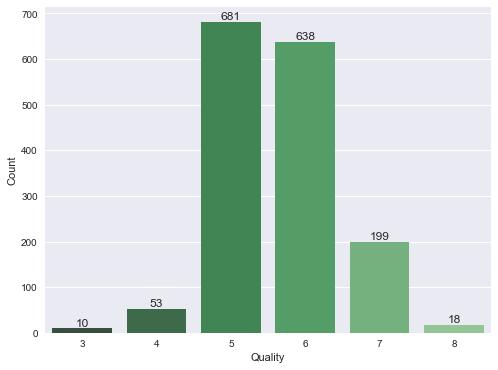

In [5]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = wine, x = 'quality', palette = 'Greens_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2.,
            y = height + 5,
            s = height,
            ha = "center")
    
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()

We could see that the best split of _Quality_ column will be between 5 and 6 because we will have well-balanced dataset. Let's do this!

In [6]:
wine['good_wine'] = (wine['quality'] > 5).astype(int)

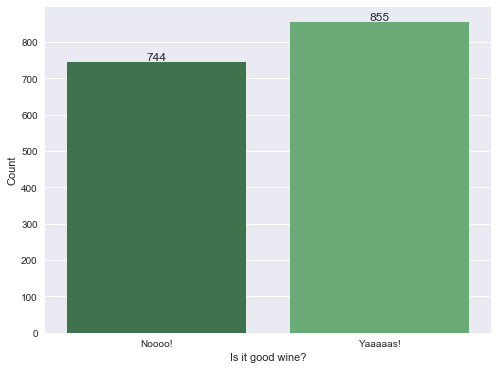

In [7]:
plt.figure(figsize = (8,6))
ax = sns.countplot(data = wine, x = 'good_wine', palette = 'Greens_d')

for p in ax.patches:
    height = p.get_height()
    ax.text(x = p.get_x() + p.get_width()/2.,
            y = height + 5,
            s = height,
            ha = "center")
    
plt.xlabel('Is it good wine?')
plt.ylabel('Count')
plt.xticks([0,1], ['Noooo!', 'Yaaaaas!'])
plt.show()

Here we have our well-balanced dataset. Now we can drop useless _Quality_ column and start EDA.

In [8]:
wine.drop(['quality'], axis = 1, inplace = True)

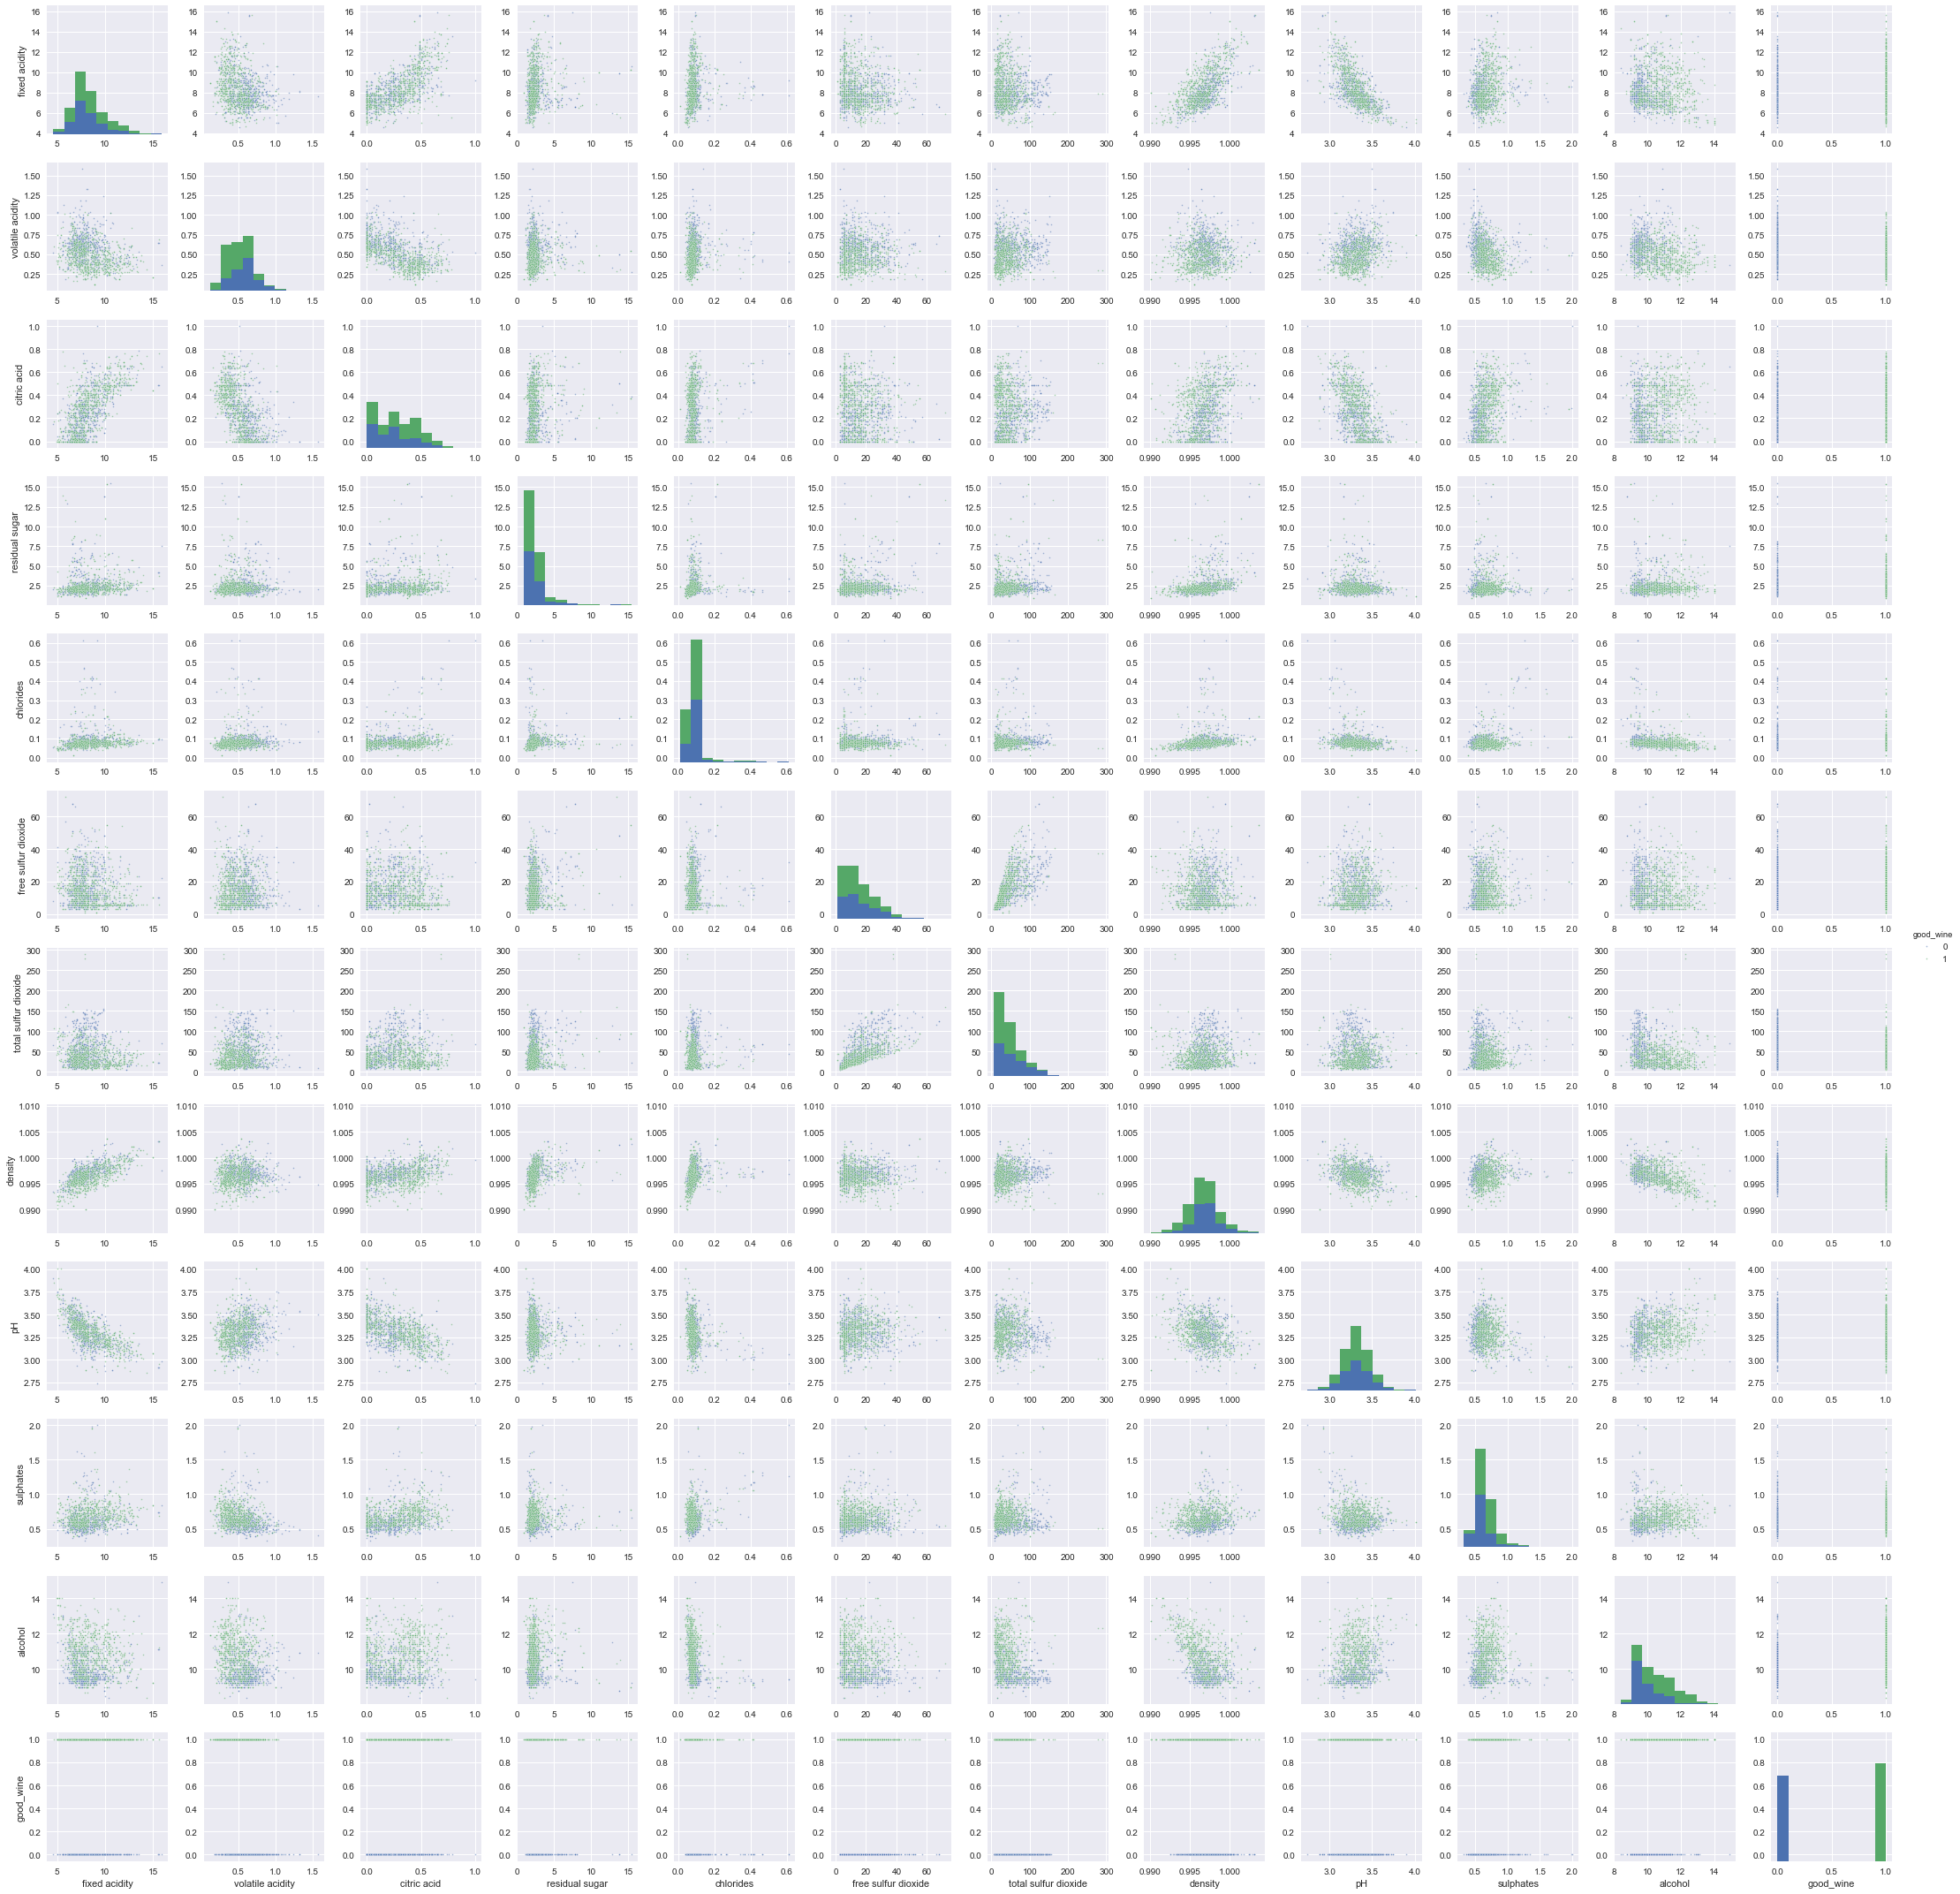

In [9]:
sns.pairplot(wine, hue = 'good_wine', plot_kws = {'alpha': 0.5, 's': 3})
plt.show()

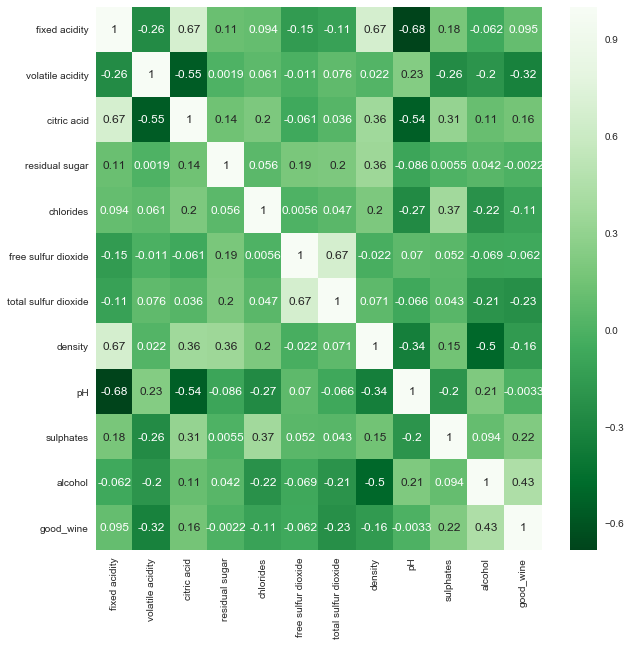

In [9]:
plt.figure(figsize = (10,10))

sns.heatmap(wine.corr(), annot = True, cmap = 'Greens_r')

plt.show()

We would like to check what makes good wine good so let's chceck distrbution of different features in terms of quality of wine.

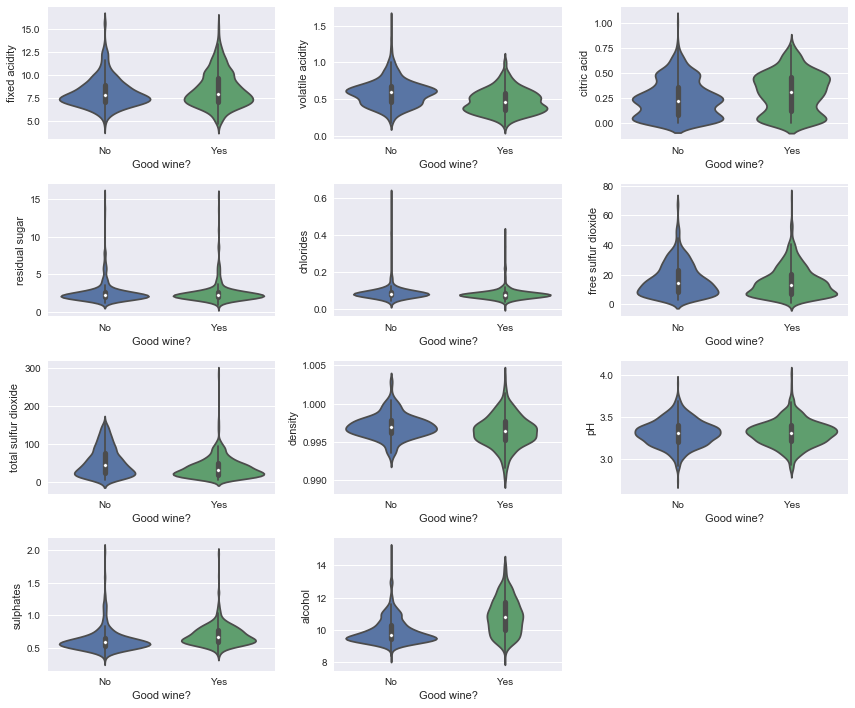

In [10]:
plt.figure(figsize = (12, 10))

for idx, column in enumerate(wine.drop('good_wine', axis = 1).columns):
    plt.subplot(4, 3, idx+1)
    sns.violinplot(data = wine, x = 'good_wine', y = column)
    plt.xlabel('Good wine?')
    plt.xticks([0,1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.preprocessing import MinMaxScaler, KernelCenterer, Normalizer, QuantileTransformer, StandardScaler
from sklearn.pipeline import Pipeline

## Spliting dataset

In [17]:
X = wine.drop('good_wine', axis = 1)
y = wine['good_wine']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 42)

D:\Games\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


## Fitting our first model

In [27]:
scaler = MinMaxScaler()

model = SVC(kernel = 'rbf',
           probability = False,
           cache_size = 1024)

param_grid = {'C': np.logspace(-4, 4, 9), 'gamma': np.logspace(-4, 4, 9), 'kernel': ['rbf']}

grid_search = GridSearchCV(model, 
                           param_grid = param_grid,  
                           n_jobs = -1, 
                           cv = 3, 
                           refit = True, 
                           verbose = 1,
                           return_train_score = True)

In [28]:
pipeline = Pipeline(steps = [
    ('scaler', scaler),
    ('GridSearch', grid_search)
])

In [29]:
pipeline.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 228 out of 243 | elapsed:   10.1s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:   12.2s finished


Pipeline(memory=None,
     steps=[('scaler', MinMaxScaler(copy=True, feature_range=(0, 1))), ('GridSearch', GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=1024, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False,...     pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1))])

In [30]:
pipeline.named_steps['GridSearch'].best_params_

{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}

In [31]:
pipeline.named_steps['GridSearch'].best_score_

0.7578194816800715

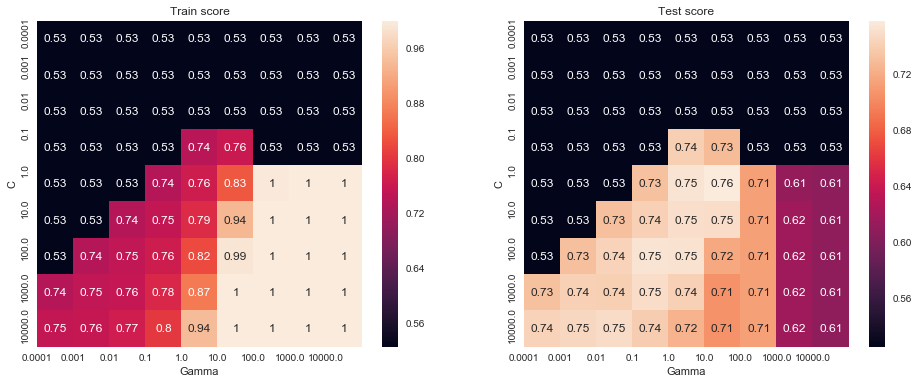

In [32]:
plt.figure(figsize = (16,6))

plt.subplot(1, 2, 1)
plt.title('Train score')
sns.heatmap(pipeline.named_steps['GridSearch'].cv_results_['mean_train_score'].reshape(9,9), annot = True)
plt.xticks(np.arange(0,9), np.logspace(-4, 4, 9))
plt.xlabel('Gamma')
plt.yticks(np.arange(0,9), np.logspace(-4, 4, 9))
plt.ylabel('C')

plt.subplot(1, 2, 2)
plt.title('Test score')
sns.heatmap(pipeline.named_steps['GridSearch'].cv_results_['mean_test_score'].reshape(9,9), annot = True)
plt.xticks(np.arange(0,9), np.logspace(-4, 4, 9))
plt.xlabel('Gamma')
plt.yticks(np.arange(0,9), np.logspace(-4, 4, 9))
plt.ylabel('C')

plt.show()

In [33]:
y_hat = pipeline.predict(X_test)
accuracy_score(y_test, y_hat)

0.7645833333333333

In [34]:
pipeline.named_steps['GridSearch'].best_params_

{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}

## Looking for good scalers

In [37]:
def find_best_estimator_with_scaler(X_train, y_train, param_grid, scalers = [None], cv = 3):
    names = []
    train_scores = []
    train_scores_std = []
    test_scores = []
    test_scores_std = []
    best_parameters = []
    estimators = []

    svm = SVC(probability = False,
              cache_size = 2048)

    grid_search_svm = GridSearchCV(svm, 
                                   param_grid = param_grid, 
                                   scoring = make_scorer(accuracy_score), 
                                   n_jobs = -1, 
                                   cv = cv, 
                                   refit = True, 
                                   verbose = 1,
                                   return_train_score = True)

    for scaler in scalers:
        pipeline = Pipeline(steps = [('scaler', scaler),
                                     ('GridSearch', grid_search_svm)])
        pipeline.fit(X_train, y_train)
        
        best_index = pipeline.named_steps['GridSearch'].best_index_
        train_score = pipeline.named_steps['GridSearch'].cv_results_['mean_train_score'][best_index]
        train_score_std = pipeline.named_steps['GridSearch'].cv_results_['std_train_score'][best_index]
        test_score = pipeline.named_steps['GridSearch'].cv_results_['mean_test_score'][best_index]
        test_score_std = pipeline.named_steps['GridSearch'].cv_results_['std_test_score'][best_index]
        best_param = pipeline.named_steps['GridSearch'].best_params_

        names.append(scaler)
        train_scores.append(train_score)
        train_scores_std.append(train_score_std)
        test_scores.append(test_score)
        test_scores_std.append(test_score_std)
        best_parameters.append(best_param)
        estimators.append(pipeline)

    results = pd.DataFrame({'name': names,
                            'train_scores': train_scores,
                            'train_std': train_scores_std,
                            'test_scores': test_scores,
                            'test_std': test_scores_std,
                            'best_parameters': best_parameters,
                            'estimator': estimators},
                           columns = ['name', 'train_scores', 'train_std', 
                                      'test_scores', 'test_std', 'best_parameters', 'estimator'])
    return results

In [38]:
def results_plot(results):
    names = [str(res).split('(')[0] for res in results['name'].values]
    x = np.arange(results.shape[0])

    figure = plt.figure(figsize = (10,6))
    ax = figure.add_subplot(1, 1, 1)
    plt.title('Scores of grid search')

    results.plot(x = x, y = 'train_scores', marker = 'o', label = 'Train', yerr = 'train_std', ax = ax)
    results.plot(x = x + 0.05, y = 'test_scores', marker = 'o', label = 'Test', yerr = 'test_std', ax = ax)

    plt.ylabel('Results')
    plt.legend(loc = 'upper left')
    plt.xticks(x, names, rotation = 45)
    plt.xlim([-0.1, results.shape[0] - 0.85])
    plt.show()

In [39]:
scalers = [None, MinMaxScaler(), MinMaxScaler((-1, 1)), KernelCenterer(), 
           Normalizer(), QuantileTransformer(), StandardScaler()]
param_grid = [
  {'C': np.logspace(-1, 3, 5), 'kernel': ['linear']},
  {'C': np.logspace(-1, 3, 5), 'gamma': np.logspace(-2, 1, 5), 'kernel': ['rbf']},
 ]

results = find_best_estimator_with_scaler(X_train, y_train, param_grid, scalers, cv = 5)

results

Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  5.3min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:   10.9s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.0s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   15.6s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:  8.1min finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 135 out of 150 | elapsed:    9.1s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   11.8s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   16.3s finished


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   39.1s finished


,name,train_scores,train_std,test_scores,test_std,best_parameters,estimator
0,None,0.756260,0.009563,0.754245,0.037786,"{'C': 1.0, 'kernel': 'linear'}","Pipeline(memory=None,\n steps=[('scaler', ..."
1,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.913318,0.005083,0.763181,0.035316,"{'C': 1000.0, 'gamma': 1.7782794100389228, 'ke...","Pipeline(memory=None,\n steps=[('scaler', ..."
2,"MinMaxScaler(copy=True, feature_range=(-1, 1))",0.947275,0.004426,0.763181,0.032315,"{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}","Pipeline(memory=None,\n steps=[('scaler', ..."
3,KernelCenterer(),0.753802,0.008787,0.752458,0.032824,"{'C': 1.0, 'kernel': 'linear'}","Pipeline(memory=None,\n steps=[('scaler', ..."
4,"Normalizer(copy=True, norm='l2')",0.785972,0.010257,0.760500,0.034689,"{'C': 1000.0, 'gamma': 1.7782794100389228, 'ke...","Pipeline(memory=None,\n steps=[('scaler', ..."
5,"QuantileTransformer(copy=True, ignore_implicit...",0.988383,0.002298,0.773905,0.023932,"{'C': 1.0, 'gamma': 10.0, 'kernel': 'rbf'}","Pipeline(memory=None,\n steps=[('scaler', ..."
6,"StandardScaler(copy=True, with_mean=True, with...",0.868188,0.011073,0.767650,0.033352,"{'C': 1.0, 'gamma': 0.31622776601683794, 'kern...","Pipeline(memory=None,\n steps=[('scaler', ..."


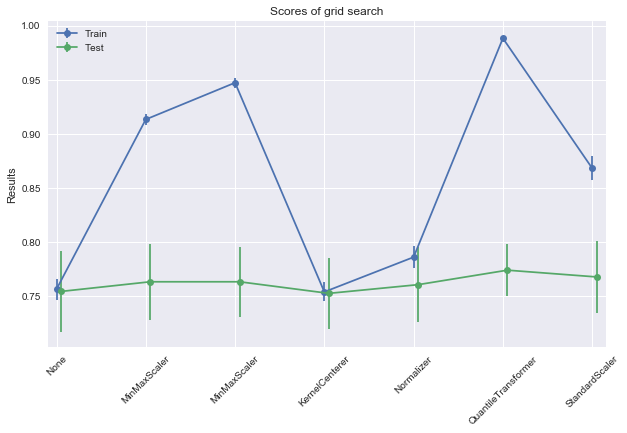

In [40]:
results_plot(results)

In [41]:
results['C'] = results.best_parameters.apply(lambda x: x['C'])
results['gamma'] = results.best_parameters.apply(lambda x: x['gamma'] if 'gamma' in x.keys()else None)
results['kernel'] = results.best_parameters.apply(lambda x: x['kernel'])

In [42]:
results_to_show = results[['name', 'train_scores', 'test_scores', 'C', 'gamma', 'kernel']]
results_to_show

,name,train_scores,test_scores,C,gamma,kernel
0,None,0.756260,0.754245,1.0,NaN,linear
1,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.913318,0.763181,1000.0,1.778279,rbf
2,"MinMaxScaler(copy=True, feature_range=(-1, 1))",0.947275,0.763181,1.0,10.000000,rbf
3,KernelCenterer(),0.753802,0.752458,1.0,NaN,linear
4,"Normalizer(copy=True, norm='l2')",0.785972,0.760500,1000.0,1.778279,rbf
5,"QuantileTransformer(copy=True, ignore_implicit...",0.988383,0.773905,1.0,10.000000,rbf
6,"StandardScaler(copy=True, with_mean=True, with...",0.868188,0.767650,1.0,0.316228,rbf


Ensemble prediction with hard voting

In [43]:
y_hats = np.zeros(shape = y_test.shape)
estimators_to_ensemble = results['estimator'].loc[[2,5,6]]

for estim in estimators_to_ensemble:
    y_hats += estim.predict(X_test)
    
ensemble_prediction = (y_hats/len(estimators_to_ensemble) > 0.5).astype(int)

In [44]:
accuracy_score(y_test, ensemble_prediction)

0.7520833333333333

## Second try of searching

To next analysis we will take MinMaxScalers, QuantileTransformers, StandardScaler and try to find better hyperparameters.

In [45]:
scalers = [MinMaxScaler(), MinMaxScaler((-1, 1)), QuantileTransformer(output_distribution = 'uniform'),
           QuantileTransformer(output_distribution = 'normal'), StandardScaler()]

param_grid = [
  {'C': np.logspace(-2, 2, 20), 'gamma': np.logspace(-2, 2, 20), 'kernel': ['rbf']}
 ]

second_search = find_best_estimator_with_scaler(X_train, y_train, param_grid, scalers, cv = 5)

second_search

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   10.6s
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 1503 tasks      | elapsed:   26.3s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   40.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   41.1s finished


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done 1508 tasks      | elapsed:   28.4s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   46.5s finished


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 305 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done 1505 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 1985 out of 2000 | elapsed:   46.2s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:   46.7s finished


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 303 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:   19.7s
[Parallel(n_jobs=-1)]: Done 1503 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.1min finished


Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done 300 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done 800 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 1500 tasks      | elapsed:   39.1s
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  1.0min finished


,name,train_scores,train_std,test_scores,test_std,best_parameters,estimator
0,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.954647,0.003048,0.766756,0.030784,"{'C': 1.2742749857031335, 'gamma': 37.92690190...","Pipeline(memory=None,\n steps=[('scaler', ..."
1,"MinMaxScaler(copy=True, feature_range=(-1, 1))",0.951295,0.002086,0.768543,0.032233,"{'C': 1.2742749857031335, 'gamma': 8.858667904...","Pipeline(memory=None,\n steps=[('scaler', ..."
2,"QuantileTransformer(copy=True, ignore_implicit...",0.963137,0.005696,0.779267,0.038000,"{'C': 1.2742749857031335, 'gamma': 5.455594781...","Pipeline(memory=None,\n steps=[('scaler', ..."
3,"QuantileTransformer(copy=True, ignore_implicit...",0.960907,0.006940,0.768543,0.028266,"{'C': 1.2742749857031335, 'gamma': 0.483293023...","Pipeline(memory=None,\n steps=[('scaler', ..."
4,"StandardScaler(copy=True, with_mean=True, with...",0.827304,0.008555,0.773905,0.040833,"{'C': 2.06913808111479, 'gamma': 0.11288378916...","Pipeline(memory=None,\n steps=[('scaler', ..."


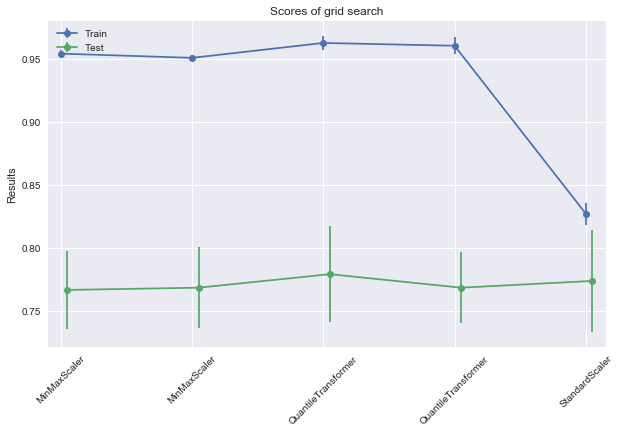

In [46]:
results_plot(second_search)

In [47]:
y_hats = np.zeros(shape = y_test.shape)
estimators_to_ensemble = second_search['estimator']

for estim in estimators_to_ensemble:
    y_hats += estim.predict(X_test)
    
ensemble_prediction_second_search = (y_hats/len(estimators_to_ensemble) > 0.5).astype(int)

In [48]:
accuracy_score(y_test, ensemble_prediction_second_search)

0.7458333333333333

After analyzing above plot we will take SVM model with QuantileTransformer('Uniform'). It has got the best test score and even if we take test score value and substract standard deviation this model is the best one. One thing that could worry us is fact that we have got a huge gap betweend train and test scores. In general it may tell us that our model is overfitted but for that moment we will ignore that.

## Analysis of prediction errors

In [147]:
quantile_svm = second_search.iloc[1]['estimator']

In [148]:
y_hat_quantile_svm = quantile_svm.predict(X_test)

In [149]:
test_df = pd.DataFrame(X_test).copy()
test_df['good_wine_true'] = y_test
test_df['good_wine_pred'] = y_hat_quantile_svm
test_df['error'] = (test_df['good_wine_true'] != test_df['good_wine_pred']).astype(int)

In [150]:
test_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,good_wine_true,good_wine_pred,error
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6,1,1,0
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5,0,0,0
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9,1,1,0
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8,0,1,1
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6,1,1,0


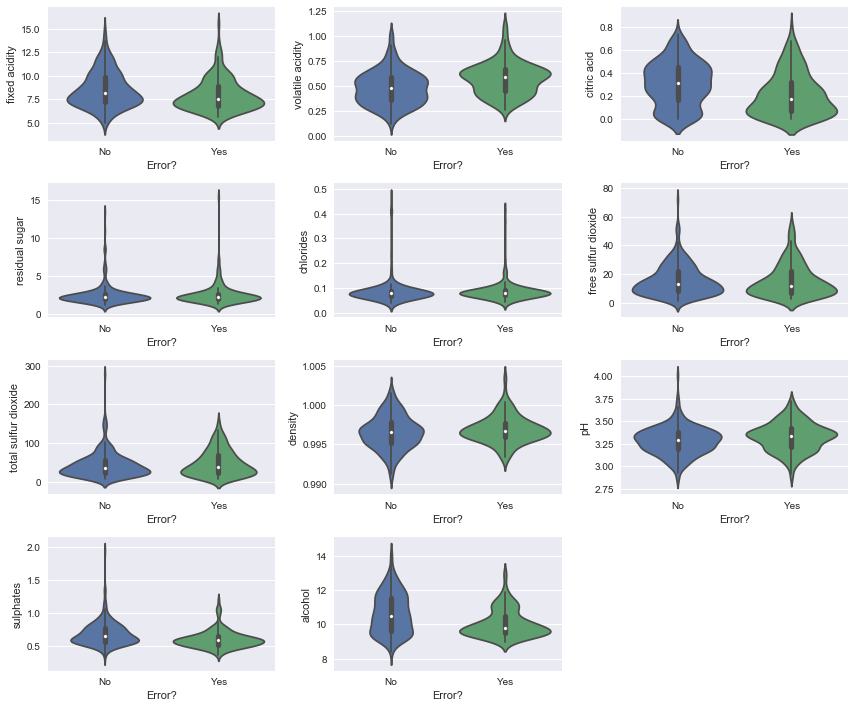

In [151]:
plt.figure(figsize = (12, 10))

for idx, column in enumerate(test_df.drop(['good_wine_true', 'good_wine_pred', 'error'], axis = 1).columns):
    plt.subplot(4, 3, idx+1)
    sns.violinplot(data = test_df, x = 'error', y = column)
    plt.xlabel('Error?')
    plt.xticks([0,1], ['No', 'Yes'])

plt.tight_layout()
plt.show()

As we can see, there is some differences in distribution of alcohol. Let's what we could do better about that.

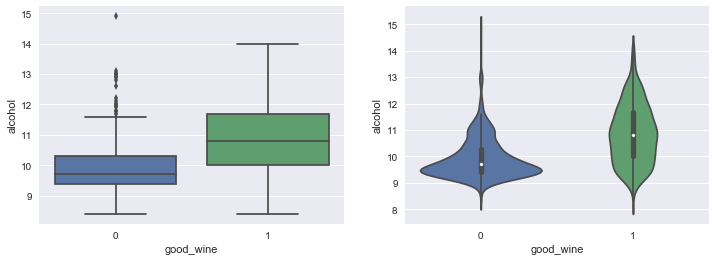

In [170]:
plt.figure(figsize = (12,4))

plt.subplot(1,2,1)
sns.boxplot(x = 'good_wine', y = 'alcohol', data = wine)

plt.subplot(1,2,2)
sns.violinplot(x = 'good_wine', y = 'alcohol', data = wine)

plt.show()

After analysis of above plots in next model we will try to make this kind of predictions:
 - 1 for that wine which has got alcohol above 0.8 percentile of good wines
 - 0 for that wine which has got alcohol below 0.2 percentile of bad wines
 - Prediction of SVM model for that wine which has got alcohol between these values

## Spliting dataset on quartiles of alcohol - third search

In [53]:
def find_best_estimator_with_quartiles_split(X_train, y_train, param_grid, scalers = [None], cv = 3):

    good_wine_q3 = X_train.loc[wine['good_wine'] == 1, 'alcohol'].quantile(0.8)
    bad_wine_q1 = X_train.loc[wine['good_wine'] == 0, 'alcohol'].quantile(0.2)
    
    def predict_quartile(predict_function, sample):
        if sample['alcohol'] > good_wine_q3:
            return np.array([1])
        elif sample['alcohol'] < bad_wine_q1:
            return np.array([0])
        else:
            return predict_function(sample.values.reshape(1,-1))

    def predict_quartile_all(predict_function, X_test):
        res = X_test.apply(lambda x: predict_quartile(predict_function, x), axis = 1).iloc[:, 0].values
        return res

    idx_between_quartiles = np.logical_and(bad_wine_q1 < X_train['alcohol'],X_train['alcohol'] < good_wine_q3)
    
    Xq_train = X_train[idx_between_quartiles]
    yq_train = y_train[idx_between_quartiles]
    
    
    names = []
    train_scores = []
    train_scores_std = []
    test_scores = []
    test_scores_std = []
    best_parameters = []
    estimators = []

    svm = SVC(probability = False,
              cache_size = 2048)

    grid_search_svm = GridSearchCV(svm, 
                                   param_grid = param_grid, 
                                   scoring = make_scorer(accuracy_score), 
                                   n_jobs = -1, 
                                   cv = cv, 
                                   refit = True, 
                                   verbose = 1,
                                   return_train_score = True)

    for scaler in scalers:
        pipeline = Pipeline(steps = [('scaler', scaler),
                                     ('GridSearch', grid_search_svm)])
        pipeline.fit(Xq_train, yq_train)
        
        best_index = pipeline.named_steps['GridSearch'].best_index_
        train_score = pipeline.named_steps['GridSearch'].cv_results_['mean_train_score'][best_index]
        train_score_std = pipeline.named_steps['GridSearch'].cv_results_['std_train_score'][best_index]
        test_score = pipeline.named_steps['GridSearch'].cv_results_['mean_test_score'][best_index]
        test_score_std = pipeline.named_steps['GridSearch'].cv_results_['std_test_score'][best_index]
        best_param = pipeline.named_steps['GridSearch'].best_params_

        names.append(scaler)
        train_scores.append(train_score)
        train_scores_std.append(train_score_std)
        test_scores.append(test_score)
        test_scores_std.append(test_score_std)
        best_parameters.append(best_param)
        estimators.append(pipeline)

    results = pd.DataFrame({'name': names,
                            'train_scores': train_scores,
                            'train_std': train_scores_std,
                            'test_scores': test_scores,
                            'test_std': test_scores_std,
                            'best_parameters': best_parameters,
                            'estimator': estimators},
                           columns = ['name', 'train_scores', 'train_std', 
                                      'test_scores', 'test_std', 'best_parameters', 'estimator'])
    return results

In [54]:
scalers = [QuantileTransformer(output_distribution = 'uniform'), StandardScaler()]

param_grid = [
  {'C': np.logspace(-2, 2, 10), 'gamma': np.logspace(-2, 2, 10), 'kernel': ['rbf']}
 ]

quartile_search = find_best_estimator_with_quartiles_split(X_train, y_train, param_grid, scalers, cv = 5)
quartile_search

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   12.8s finished


Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:   13.4s finished


,name,train_scores,train_std,test_scores,test_std,best_parameters,estimator
0,"QuantileTransformer(copy=True, ignore_implicit...",0.980428,0.004331,0.744544,0.030476,"{'C': 1.6681005372000592, 'gamma': 4.641588833...","Pipeline(memory=None,\n steps=[('scaler', ..."
1,"StandardScaler(copy=True, with_mean=True, with...",0.826064,0.006093,0.752246,0.031260,"{'C': 0.5994842503189409, 'gamma': 0.215443469...","Pipeline(memory=None,\n steps=[('scaler', ..."


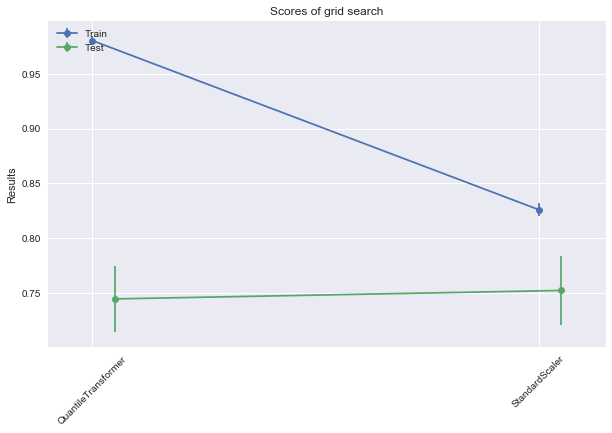

In [55]:
results_plot(quartile_search)

As we may see these models do not perform better than previous ones. In fact of that finally we will take the best model from second search.

## Prediction

In [81]:
best_model = second_search.loc[2, 'estimator']

In [82]:
y_hat = best_model.predict(X_test)

In [83]:
accuracy_score(y_test, y_hat)

0.6145833333333334

Not so good score :(

Let's check how rest of our models mangaged testing.

In [91]:
def final_results_plot(results):
    names = [str(res).split('(')[0] for res in results['name'].values]
    x = np.arange(results.shape[0])

    figure = plt.figure(figsize = (10,6))
    ax = figure.add_subplot(1, 1, 1)
    plt.title('Scores of grid search')

    results.plot(x = x, y = 'train_scores', marker = 'o', label = 'Train', yerr = 'train_std', ax = ax)
    results.plot(x = x + 0.05, y = 'test_scores', marker = 'o', label = 'Test', yerr = 'test_std', ax = ax)
    results.plot(x = x - 0.05, y = 'results', marker = 'o', label = 'Predict', ax = ax)

    plt.ylabel('Results')
    plt.legend(loc = 'upper left')
    plt.xticks(x, names, rotation = 45)
    plt.xlim([-0.15, results.shape[0] - 0.85])
    plt.show()

In [92]:
predict_scores = second_search['estimator'].apply(lambda x: accuracy_score(y_test, x.predict(X_test)))

In [93]:
final_results = second_search.copy()
final_results['results'] = predict_scores

In [94]:
final_results.head()

,name,train_scores,train_std,test_scores,test_std,best_parameters,estimator,results
0,"MinMaxScaler(copy=True, feature_range=(0, 1))",0.954647,0.003048,0.766756,0.030784,"{'C': 1.2742749857031335, 'gamma': 37.92690190...","Pipeline(memory=None,\n steps=[('scaler', ...",0.556250
1,"MinMaxScaler(copy=True, feature_range=(-1, 1))",0.951295,0.002086,0.768543,0.032233,"{'C': 1.2742749857031335, 'gamma': 8.858667904...","Pipeline(memory=None,\n steps=[('scaler', ...",0.691667
2,"QuantileTransformer(copy=True, ignore_implicit...",0.963137,0.005696,0.779267,0.038000,"{'C': 1.2742749857031335, 'gamma': 5.455594781...","Pipeline(memory=None,\n steps=[('scaler', ...",0.614583
3,"QuantileTransformer(copy=True, ignore_implicit...",0.960907,0.006940,0.768543,0.028266,"{'C': 1.2742749857031335, 'gamma': 0.483293023...","Pipeline(memory=None,\n steps=[('scaler', ...",0.733333
4,"StandardScaler(copy=True, with_mean=True, with...",0.827304,0.008555,0.773905,0.040833,"{'C': 2.06913808111479, 'gamma': 0.11288378916...","Pipeline(memory=None,\n steps=[('scaler', ...",0.760417


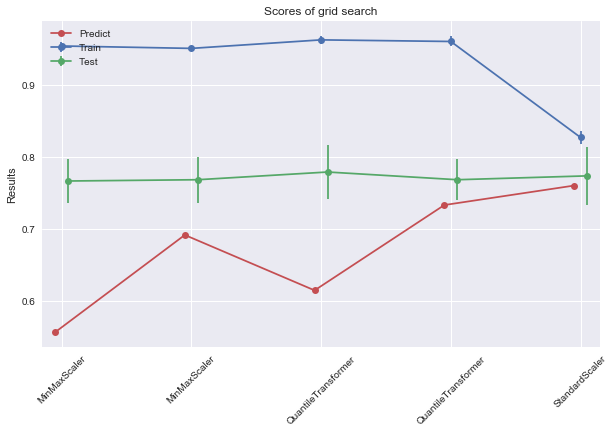

In [96]:
final_results_plot(final_results)

## Conclusion

As we see our choice was almost the worst one and the model which we reject at the first glance turned out to be the best one. On the occasion of the second analysis we mentioned that the huge gap between train and test scores may be a problem and we see that it excatly was like that.